## PART 4: Main Func: with Modifier.py
Error: the NaN values for X show up when Modifier can't generate (given the interval) new values.

[MODC]: *** Entering Modifier controller ***
[MODC]: intervals list:  [(1, 100)]

Simulator...
Validator...
       *** USING local_exploration_validator_A


CALLED FIT_CURVE
Y_PRED[ -2.52261754  -4.25954705  -7.81644714 -10.90369674 -11.55150582
  -9.76021753  -8.14898849 -10.01927938 -12.80970775   5.5210645 ]
X_VALUES[  1.           2.43478261   6.26086957  12.47826087  21.08695652
  32.08695652  45.47826087  61.26086957  79.43478261 100.        ]
EQUATIONy =  5.338192509787115e-06x^4  -0.0010140167803322296x^3 + 0.06285989473490451x^2  -1.4171301488755046x^1 -1.167338606817087
LEAST FIT POINTS:  [[1.0, 9.237902119612485], [2.4347826086956523, -18.419726774547595], [12.478260869565217, 0.05321161075110703], [21.08695652173913, -23.391568209604095], [32.086956521739125, -0.6190355501207008]]
unfit_interval [[1.0, 5.304347826086957], [7.815217391304348, 42.130434782608695]]
least_fit_points [[1.0, 9.237902119612485], [2.4347826086956523, -18.419726774547595], [12.478260869565217, 0.053

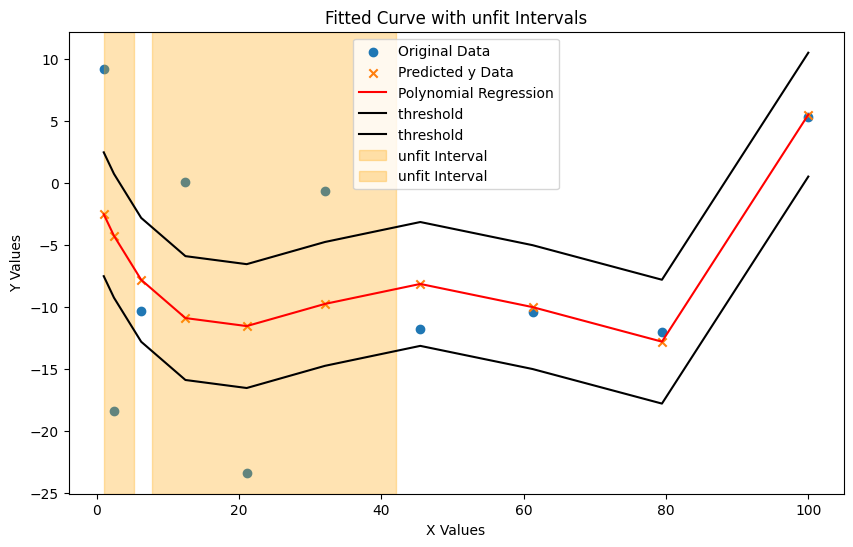

       *** OUTPUT unfit_interval [[1.0, 5.304347826086957], [7.815217391304348, 42.130434782608695]] 

equation,fit_points,fit_interval
 y =  5.338192509787115e-06x^4  -0.0010140167803322296x^3 + 0.06285989473490451x^2  -1.4171301488755046x^1 -1.167338606817087 
 [[6.260869565217392, -10.306246294679621], [45.47826086956522, -11.763787121384981], [61.26086956521739, -10.386132404852514], [79.43478260869566, -12.007380023231919], [100.0, 5.331819701031556]] 

 [[1, 1.0], [5.304347826086957, 7.815217391304348], [42.130434782608695, 100]]
       *** OUTPUT validator_intervals [[1.0, 5.304347826086957], [7.815217391304348, 42.130434782608695]] 

[MODC]: *** Entering Modifier controller ***
[MODC]: intervals list:  [[1.0, 5.304347826086957], [7.815217391304348, 42.130434782608695]]

Simulator...
Validator...
THIS IS POINTS  [[1.0, -6.671055541029127], [1.0, 9.237902119612485], [2.4347826086956523, -18.419726774547595], [7.815217391304348, -14.680072348707867], [12.264911126275429, -11.27906

/Users/davidecalvaresi/Documents/coding/SimEx/notebooks/Validator.py:68: RankWarning: Polyfit may be poorly conditioned
  current_coeff = np.polyfit(x_values, y_values, deg=degree)
/Users/davidecalvaresi/Documents/coding/SimEx/notebooks/Validator.py:68: RankWarning: Polyfit may be poorly conditioned
  current_coeff = np.polyfit(x_values, y_values, deg=degree)
/Users/davidecalvaresi/Documents/coding/SimEx/notebooks/Validator.py:68: RankWarning: Polyfit may be poorly conditioned
  current_coeff = np.polyfit(x_values, y_values, deg=degree)
/Users/davidecalvaresi/Documents/coding/SimEx/notebooks/Validator.py:68: RankWarning: Polyfit may be poorly conditioned
  current_coeff = np.polyfit(x_values, y_values, deg=degree)
/Users/davidecalvaresi/Documents/coding/SimEx/notebooks/Validator.py:68: RankWarning: Polyfit may be poorly conditioned
  current_coeff = np.polyfit(x_values, y_values, deg=degree)
/Users/davidecalvaresi/Documents/coding/SimEx/notebooks/Validator.py:68: RankWarning: Polyfit m

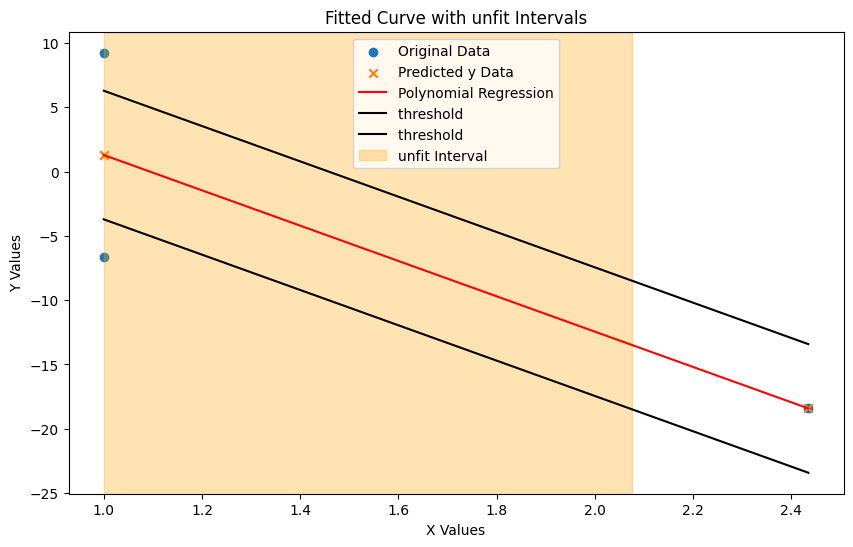

       *** OUTPUT unfit_interval [[1.0, 2.0760869565217392]] 

equation,least_fit_points,local_unfit_interval,fit_points,fit_interval
 y =  -0.007682878597157729x^7  -0.018571090823880993x^6  -0.04441014297760113x^5  -0.10327028511866057x^4  -0.22173201414579455x^3  -0.35872393170504274x^2 + 0.04519244071873769x^1 1.99262119194108 
 [[2.4347826086956523, -18.419726774547595]] 
 [[1.0, 1.0], [2.0760869565217392, 5.304347826086957]]


THIS IS self.least_fit_x_interval  [[1.0, 5.304347826086957], [7.815217391304348, 42.130434782608695]]
THIS IS EACH INTERVAL  7.815217391304348   42.130434782608695
       *** USING local_exploration_validator_A


CALLED FIT_CURVE
Y_PRED[ -8.82349849  -9.69333086  -9.73039662 -10.70984251 -10.87178318
 -11.31819612 -11.3241908  -10.75149785]
X_VALUES[ 7.81521739 12.26491113 12.47826087 19.46734527 21.08695652 29.42251982
 32.08695652 42.13043478]
EQUATIONy =  0.00466412163057855x^2  -0.2891375637060386x^1 -6.848699032506099
LEAST FIT POINTS:  [[7.8152173913

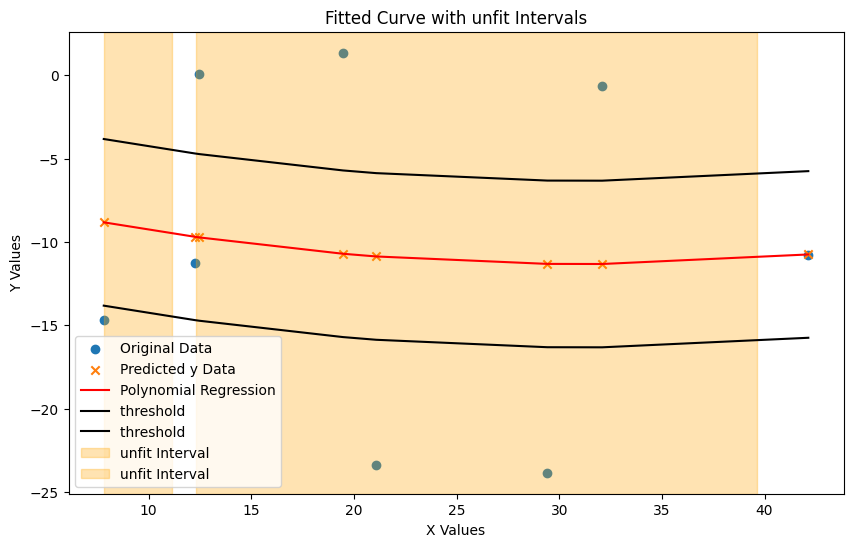

       *** OUTPUT unfit_interval [[7.815217391304348, 11.15248769253266], [12.318248562097876, 39.6195652173913]] 

equation,least_fit_points,local_unfit_interval,fit_points,fit_interval
 y =  0.00466412163057855x^2  -0.2891375637060386x^1 -6.848699032506099 
 [[12.264911126275429, -11.279062126705885], [42.13043478260869, -10.810945648824918]] 
 [[7.815217391304348, 7.815217391304348], [11.15248769253266, 12.318248562097876], [39.6195652173913, 42.130434782608695]]
       *** OUTPUT validator_intervals [[1.0, 2.0760869565217392], [7.815217391304348, 11.15248769253266], [12.318248562097876, 39.6195652173913]] 

[MODC]: *** Entering Modifier controller ***
[MODC]: intervals list:  [[1.0, 2.0760869565217392], [7.815217391304348, 11.15248769253266], [12.318248562097876, 39.6195652173913]]

Simulator...
Validator...
THIS IS POINTS  [[1.0, -8.678872899859817], [7.815217391304348, -9.717697040210295], [7.815217391304348, -14.680072348707867], [12.318248562097876, -5.098587307825743], [12.478

/Users/davidecalvaresi/Documents/coding/SimEx/notebooks/Validator.py:68: RankWarning: Polyfit may be poorly conditioned
  current_coeff = np.polyfit(x_values, y_values, deg=degree)
/Users/davidecalvaresi/Documents/coding/SimEx/notebooks/Validator.py:68: RankWarning: Polyfit may be poorly conditioned
  current_coeff = np.polyfit(x_values, y_values, deg=degree)
/Users/davidecalvaresi/Documents/coding/SimEx/notebooks/Validator.py:68: RankWarning: Polyfit may be poorly conditioned
  current_coeff = np.polyfit(x_values, y_values, deg=degree)
/Users/davidecalvaresi/Documents/coding/SimEx/notebooks/Validator.py:68: RankWarning: Polyfit may be poorly conditioned
  current_coeff = np.polyfit(x_values, y_values, deg=degree)
/Users/davidecalvaresi/Documents/coding/SimEx/notebooks/Validator.py:68: RankWarning: Polyfit may be poorly conditioned
  current_coeff = np.polyfit(x_values, y_values, deg=degree)
/Users/davidecalvaresi/Documents/coding/SimEx/notebooks/Validator.py:68: RankWarning: Polyfit m

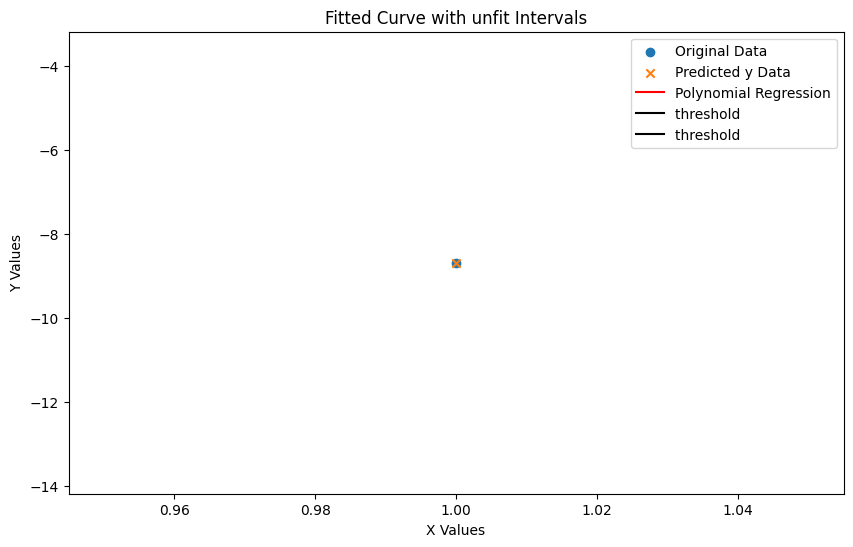

       *** OUTPUT unfit_interval [] 

equation,least_fit_points,local_unfit_interval,fit_points,fit_interval
 y =  -0.867887289985982x^9  -0.8678872899859816x^8  -0.8678872899859816x^7  -0.8678872899859816x^6  -0.8678872899859816x^5  -0.8678872899859816x^4  -0.8678872899859816x^3  -0.8678872899859816x^2  -0.8678872899859816x^1 -0.8678872899859816 
 [[1.0, -8.678872899859817]] 
 [[1.0, 2.0760869565217392]]


THIS IS self.least_fit_x_interval  [[1.0, 2.0760869565217392], [7.815217391304348, 11.15248769253266], [12.318248562097876, 39.6195652173913]]
THIS IS EACH INTERVAL  7.815217391304348   11.15248769253266
       *** USING local_exploration_validator_A


CALLED FIT_CURVE
Y_PRED[-12.19888469 -12.19888469]
X_VALUES[7.81521739 7.81521739]
EQUATIONy =  -0.0063890596946184x^3  -0.04993189043946336x^2  -0.39022857854319737x^1 -3.0497211736147696
LEAST FIT POINTS:  []
unfit_interval []
least_fit_points []
LF... rest_of_points:       [(7.815217391304348, -9.717697040210295), (7.81521739130434

/Users/davidecalvaresi/Documents/coding/SimEx/notebooks/Validator.py:68: RankWarning: Polyfit may be poorly conditioned
  current_coeff = np.polyfit(x_values, y_values, deg=degree)
/Users/davidecalvaresi/Documents/coding/SimEx/notebooks/Validator.py:68: RankWarning: Polyfit may be poorly conditioned
  current_coeff = np.polyfit(x_values, y_values, deg=degree)
/Users/davidecalvaresi/Documents/coding/SimEx/notebooks/Validator.py:68: RankWarning: Polyfit may be poorly conditioned
  current_coeff = np.polyfit(x_values, y_values, deg=degree)
/Users/davidecalvaresi/Documents/coding/SimEx/notebooks/Validator.py:68: RankWarning: Polyfit may be poorly conditioned
  current_coeff = np.polyfit(x_values, y_values, deg=degree)


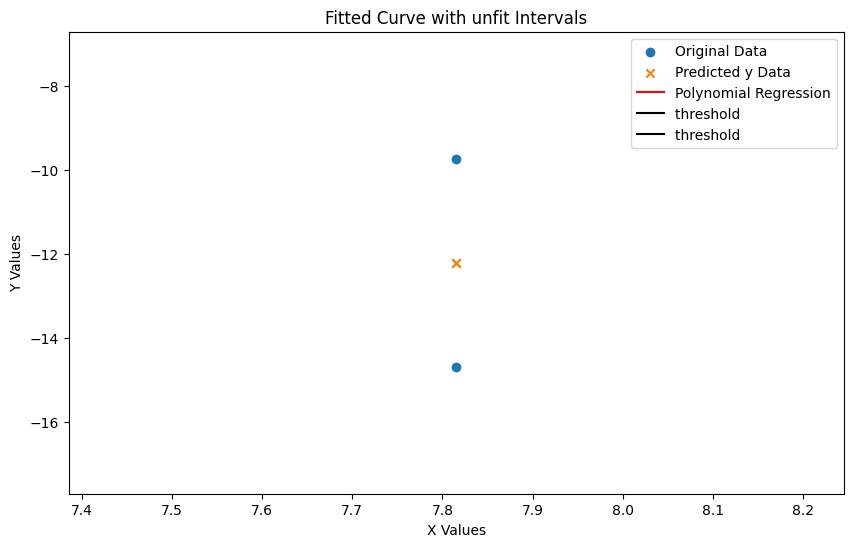

       *** OUTPUT unfit_interval [] 

equation,least_fit_points,local_unfit_interval,fit_points,fit_interval
 y =  -0.0063890596946184x^3  -0.04993189043946336x^2  -0.39022857854319737x^1 -3.0497211736147696 
 [[7.815217391304348, -9.717697040210295], [7.815217391304348, -14.680072348707867]] 
 [[7.815217391304348, 11.15248769253266]]


THIS IS self.least_fit_x_interval  [[1.0, 2.0760869565217392], [7.815217391304348, 11.15248769253266], [12.318248562097876, 39.6195652173913]]
THIS IS EACH INTERVAL  12.318248562097876   39.6195652173913
       *** USING local_exploration_validator_A


CALLED FIT_CURVE
Y_PRED[ -6.54720598  -6.46222478  -5.42756925  -4.93552545  -4.99522739
  -5.28169047  -5.76260384  -8.75133707 -10.48421334 -13.46396393
 -14.89526111 -25.33891531]
X_VALUES[12.31824856 12.47826087 14.99735486 18.42490642 19.46734527 21.08695652
 22.60090324 27.52534531 29.42251982 32.08695652 33.19823263 39.61956522]
EQUATIONy =  -0.04492781313693937x^2 + 1.6451445875515427x^1 -19.99519

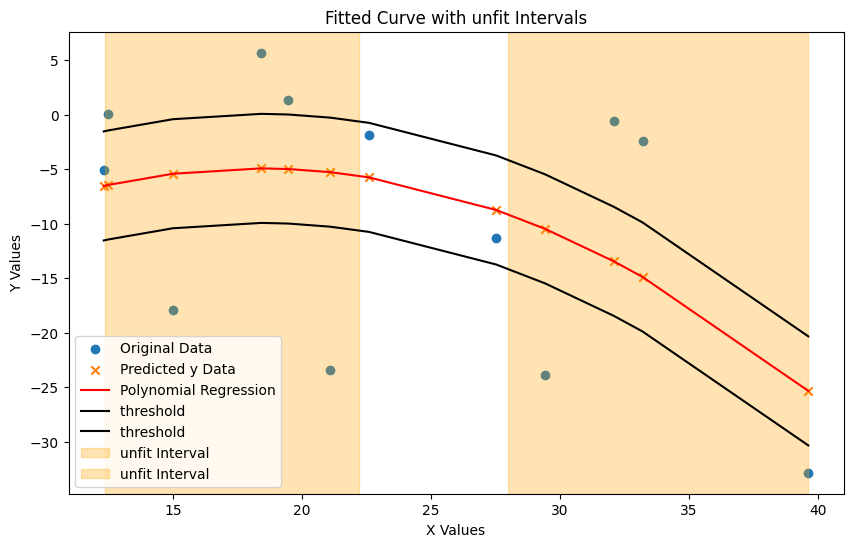

       *** OUTPUT unfit_interval [[12.358251638964711, 22.222416558789767], [27.99963893674339, 39.6195652173913]] 

equation,least_fit_points,local_unfit_interval,fit_points,fit_interval
 y =  -0.04492781313693937x^2 + 1.6451445875515427x^1 -19.995193364551636 
 [[12.318248562097876, -5.098587307825743], [22.600903237806644, -1.897535747795478], [27.525345308348655, -11.338842058372585]] 
 [[12.318248562097876, 12.358251638964711], [22.222416558789767, 27.99963893674339]]
       *** OUTPUT validator_intervals [[12.358251638964711, 22.222416558789767], [27.99963893674339, 39.6195652173913]] 

[MODC]: *** Entering Modifier controller ***
[MODC]: intervals list:  [[12.358251638964711, 22.222416558789767], [27.99963893674339, 39.6195652173913]]


In [1]:
# IMPORT LIBRARIES
import numpy as np

# import global parameters 
# TODO: make interface (widget) to load/change the parameters (low-priority)
from global_settings import mdv,simexSettings

#import classes for Modifier, Simulator, and Validator,
from Validator import Validator
from Modifier import Modifier
from Simulator import Simulator
from Logger import Logger

validator = Validator()
modifier = Modifier
simulator = Simulator
logger = Logger()

logger_main_arguments = {
    'log_contex': 'overall MAIN stats',
    'main_status': 'begin cycle'
}

logger.log_main(logger_main_arguments)

is_main_func = True
# Initialize interval list
intervals_list=[(mdv['domain_min_interval'], mdv['domain_max_interval'])]





while is_main_func:
    
    # Calls Modifier Controller
    mod_outcome = modifier.modifier_controller(intervals_list=intervals_list,local_modifier=modifier.local_modifier_A, do_plot=simexSettings['do_plot'])
    mod_x_list = mod_outcome[0]
    checked_intervals = mod_outcome[1]
    # breaks loop if iterations end by granularity reached
    if not mod_x_list: # FALSE IF ['modifier_data_point'] < mdv['modifier_incremental_unit']:
        logger_main_arguments['log_contex'] = 'overall MAIN stats'
        logger_main_arguments['main_status'] = 'no generated points'
        logger_main_arguments['remaining_unfit_intervals'] = checked_intervals
        logger.log_main(logger_main_arguments)
        break
    
    # Calls Simulator
    mod_x,sim_y_list = simulator.simulator_controller(mod_x_list,selected_function=simulator.sim_func_B)
    assert len(mod_x) == len(sim_y_list)
    
    
    # print('\n\n Modx: ',mod_x,'\nsymx: ',sim_y_list)
    
    # Calls Validator controller
    intervals_list = validator.validator_controller(mod_x_list=np.array(mod_x),sim_y_list=np.array(sim_y_list))
    # Updates interval_list to new range output from validator controller

    if not intervals_list:
        is_main_func = False
        logger_main_arguments['log_contex'] = 'overall MAIN stats'
        logger_main_arguments['main_status'] = 'no unfit intervals'
        logger.log_main(logger_main_arguments)
logger_main_arguments['log_contex'] = 'Overall Stats'                          
logger_main_arguments['main_status'] = 'end cycle'
logger.log_main(logger_main_arguments)

